In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import glob

# Importing and Preparing the data

In [189]:
# Read the "LMO_Detailed_Industries_by_NAICS" file
df_lmo=pd.read_excel('LMO_Detailed_Industries_by_NAICS.xlsx')

In [190]:
# Create NAICS_code column that contains the codes of the industrie as a list
l=df_lmo['NAICS'].astype(str).str.replace(' &',',').str.split(', ')

df_lmo['NAICS_code']=l
df_lmo.head()

,LMO_Detailed_Industry,NAICS,NAICS_code
0,Farms,111 & 112,"[111, 112]"
1,"Fishing, hunting and trapping",114,[114]
2,Forestry and logging,113,[113]
3,Support activities for agriculture and forestry,115,[115]
4,Oil and gas extraction,211,[211]


In [191]:
#import "RTRA_Employ..." files
df2=glob.glob('*2NAICS*.csv')
df3=glob.glob('*3NAICS*.csv')
df4=glob.glob('*4NAICS*.csv')

In [192]:
def create_files(files):
    '''
    The function will concat the files that have the same number of digits in its code
    Args:
    ''''''''
    files: the files that will be added or conctenated to each other
    Returns:
    ''''''''''''
    One file that contains all the data that were in separate files at first. 
    
    '''
    
    lis=[]
    for filename in files:
        df=pd.read_csv(filename,index_col=None, header=0)
        lis.append(df)
    
    result=pd.concat(lis, axis=0, ignore_index=True)
    return result

In [193]:
df_2NAICS=create_files(df2)
df_3NAICS=create_files(df3)
df_4NAICS=create_files(df4)


In [194]:
df_2NAICS.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,2000,1,Accommodation and food services [72],148000
1,2000,1,"Administrative and support, waste management a...",59250
2,2000,1,"Agriculture, forestry, fishing and hunting [11]",61750
3,2000,1,"Arts, entertainment and recreation [71]",39500
4,2000,1,Construction [23],106250


In [195]:
df_3NAICS.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,2000,1,Aboriginal public administration[914],500
1,2000,1,Accommodation services[721],33750
2,2000,1,Administrative and support services[561],55250
3,2000,1,Air transportation[481],17500
4,2000,1,Ambulatory health care services[621],53000


In [196]:
df_4NAICS.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,2000,1,1100,500
1,2000,1,1111,0
2,2000,1,1112,2000
3,2000,1,1113,250
4,2000,1,1114,7750


In [197]:
def create_data(df,two_digit=False,three_digit=False,four_digit=False):
    '''
    The function will match between the data that exist in the 'LMO_Detailed_Industries_by_NAICS' file 
    and the data in 'RTRA_Employ' files through the codes that exist in both of them and add a new column to the 'RTRA_Employ' 
    data based on the matched column.
    
    Args:
    --------------------
    df: csv file that contain the data from RTRA_Employ files 
    
    two_digit: bool that refers to whether the given file contains 2 digits as ID or not 
    
    three digit: bool that refers to whether the given file contains 3 digits as ID or not
    
    four digit: bool that refers to whether the given file contains 4 digits as ID or not
    
    Returns:
    '''''''''''''''''''
    the final data that resulted from the matching codes between the 'LMO_Detailed_Industries_by_NAICS' and 'RTRA_Employ' files
    by adding the 'LMO_Detailed_Industry' column to the RTRA data. 
    
    
    '''
    
    if two_digit:
        result = pd.DataFrame(df_2NAICS['NAICS'].str.split('[').tolist(), columns=["naics", "code"])
        result = pd.DataFrame(result['code'].str.replace(']', '').str.split('-').tolist(), columns=["l_code", "u_code"])
    
        df['l_code']=result['l_code']
        df['u_code']=result['u_code']
    
        def check(new_df):
            '''
            The function will check if the codes in the 'RTRA_Employ' file exist in the 'LMO_Detailed_Industries_by_NAICS' file
            and if so, it will create new dataframe that contains the respective 'LMO_Detailed_Industry' column
            
            Args:
            ''''''''''''''
            new_df: the 'RTRA_Employ' file that will be matched with 'LMO_Detailed_Industries_by_NAICS' file
            
            Returns:
            '''''''''''''
            The dataframe that contain the data that are common between both files with the 'LMO_Detailed_Industry'
            
            '''
            lmo=df_lmo.apply(lambda x:x['LMO_Detailed_Industry'] 
                    if (new_df['l_code']in x['NAICS_code']) or (new_df['u_code'] in x['NAICS_code']) 
                    else np.nan,axis=1 )
            lmo = lmo.dropna(how='all', axis=0)
            if lmo.empty:
                lmo = np.nan
            else:
                lmo = lmo.to_string(index=False)
    
            return lmo
    
        df["LMO_Detailed_Industry"] = df.apply(check, axis=1)
        return df
    
    
    elif three_digit:
        result = pd.DataFrame(df_3NAICS['NAICS'].str.split('[').tolist(), columns=["naics", "code"])
        result['code'] = result['code'].str.replace(']','')
        
        df['code']=result['code']
        
        def check(new_df):
            '''
            The function will check if the codes in the 'RTRA_Employ' file exist in the 'LMO_Detailed_Industries_by_NAICS' file
            and if so, it will create new dataframe that contains the respective 'LMO_Detailed_Industry' column
            
            Args:
            ''''''''''''''
            new_df: the 'RTRA_Employ' file that will be matched with 'LMO_Detailed_Industries_by_NAICS' file
            
            Returns:
            '''''''''''''
            The dataframe that contain the data that are common between both files with the 'LMO_Detailed_Industry'
            
            '''
            
            
            lmo=df_lmo.apply(lambda x:x['LMO_Detailed_Industry'] 
                    if (new_df['code']in x['NAICS_code'])
                    else np.nan,axis=1 )
            lmo = lmo.dropna(how='all', axis=0)
            if lmo.empty:
                lmo = np.nan
            else:
                lmo = lmo.to_string(index=False)
    
            return lmo
    
        df["LMO_Detailed_Industry"] = df.apply(check, axis=1)
        return df
    
    
    
    elif four_digit:
        def check(new_df):
            '''
            The function will check if the codes in the 'RTRA_Employ' file exist in the 'LMO_Detailed_Industries_by_NAICS' file
            and if so, it will create new dataframe that contains the respective 'LMO_Detailed_Industry' column
            
            Args:
            ''''''''''''''
            new_df: the 'RTRA_Employ' file that will be matched with 'LMO_Detailed_Industries_by_NAICS' file
            
            Returns:
            '''''''''''''
            The dataframe that contain the data that are common between both files with the 'LMO_Detailed_Industry'
            
            '''
            
            lmo=df_lmo.apply(lambda x:x['LMO_Detailed_Industry'] 
                    if (new_df['NAICS']in x['NAICS_code'])
                    else np.nan,axis=1 )
            lmo = lmo.dropna(how='all', axis=0)
            if lmo.empty:
                lmo = np.nan
            else:
                lmo = lmo.to_string(index=False)
    
            return lmo
        
        df["LMO_Detailed_Industry"] = df.apply(check, axis=1)
        return df
    else:
        pass

In [198]:
data_2_digit=create_data(df_2NAICS,two_digit=True)
data_3_digit=create_data(df_3NAICS,three_digit=True)
data_4_digit=create_data(df_4NAICS,four_digit=True)

<ipython-input-197-d75da3c33440>:27: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  result = pd.DataFrame(result['code'].str.replace(']', '').str.split('-').tolist(), columns=["l_code", "u_code"])
<ipython-input-197-d75da3c33440>:63: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  result['code'] = result['code'].str.replace(']','')


In [199]:
data_2_digit.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,l_code,u_code,LMO_Detailed_Industry
0,2000,1,Accommodation and food services [72],148000,72,None,NaN
1,2000,1,"Administrative and support, waste management a...",59250,56,None,"Business, building and other support services"
2,2000,1,"Agriculture, forestry, fishing and hunting [11]",61750,11,None,NaN
3,2000,1,"Arts, entertainment and recreation [71]",39500,71,None,NaN
4,2000,1,Construction [23],106250,23,None,Construction


In [200]:
data_3_digit.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,code,LMO_Detailed_Industry
0,2000,1,Aboriginal public administration[914],500,914,Local and Indigenous public administration
1,2000,1,Accommodation services[721],33750,721,Accommodation services
2,2000,1,Administrative and support services[561],55250,561,NaN
3,2000,1,Air transportation[481],17500,481,Air transportation
4,2000,1,Ambulatory health care services[621],53000,621,Ambulatory health care services


In [201]:
data_4_digit.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,LMO_Detailed_Industry
0,2000,1,1100,500,NaN
1,2000,1,1111,0,NaN
2,2000,1,1112,2000,NaN
3,2000,1,1113,250,NaN
4,2000,1,1114,7750,NaN


In [202]:
def create_date_column(df):
    '''
    The function will create new column that contains the full date (month and year) and set that new column as an index
    and then drop the month and year columns
    Args:
    ''''''''
    df: the dataframe that the new column will be inserted into
    
    Returns:
    ''''''''''''
    The final dataframe with the date column that contain the year and the month
    '''
    
    df['Date'] = df.SMTH.astype(str) + ' ' + df.SYEAR.astype(str)
    df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m')
    df.drop(columns=['SYEAR', 'SMTH'], inplace=True)
    df=df.set_index('Date')
    return df

In [203]:
data_2_digit=create_date_column(data_2_digit)
data_3_digit=create_date_column(data_3_digit)
data_4_digit=create_date_column(data_4_digit)

In [204]:
data_2_digit.head()

,NAICS,_EMPLOYMENT_,l_code,u_code,LMO_Detailed_Industry
Date,,,,,
2000-01,Accommodation and food services [72],148000,72,None,NaN
2000-01,"Administrative and support, waste management a...",59250,56,None,"Business, building and other support services"
2000-01,"Agriculture, forestry, fishing and hunting [11]",61750,11,None,NaN
2000-01,"Arts, entertainment and recreation [71]",39500,71,None,NaN
2000-01,Construction [23],106250,23,None,Construction


In [205]:
data_3_digit.head()

,NAICS,_EMPLOYMENT_,code,LMO_Detailed_Industry
Date,,,,
2000-01,Aboriginal public administration[914],500,914,Local and Indigenous public administration
2000-01,Accommodation services[721],33750,721,Accommodation services
2000-01,Administrative and support services[561],55250,561,NaN
2000-01,Air transportation[481],17500,481,Air transportation
2000-01,Ambulatory health care services[621],53000,621,Ambulatory health care services


In [206]:
data_4_digit.head()

,NAICS,_EMPLOYMENT_,LMO_Detailed_Industry
Date,,,
2000-01,1100,500,NaN
2000-01,1111,0,NaN
2000-01,1112,2000,NaN
2000-01,1113,250,NaN
2000-01,1114,7750,NaN


In [207]:
# Drop the code columns from the previous files
file_2_digit=data_2_digit.drop(columns=['l_code','u_code'])
file_3_digit=data_3_digit.drop(columns='code')
file_4_digit=data_4_digit

In [208]:
file_2_digit.head()

,NAICS,_EMPLOYMENT_,LMO_Detailed_Industry
Date,,,
2000-01,Accommodation and food services [72],148000,NaN
2000-01,"Administrative and support, waste management a...",59250,"Business, building and other support services"
2000-01,"Agriculture, forestry, fishing and hunting [11]",61750,NaN
2000-01,"Arts, entertainment and recreation [71]",39500,NaN
2000-01,Construction [23],106250,Construction


In [209]:
file_3_digit.head()

,NAICS,_EMPLOYMENT_,LMO_Detailed_Industry
Date,,,
2000-01,Aboriginal public administration[914],500,Local and Indigenous public administration
2000-01,Accommodation services[721],33750,Accommodation services
2000-01,Administrative and support services[561],55250,NaN
2000-01,Air transportation[481],17500,Air transportation
2000-01,Ambulatory health care services[621],53000,Ambulatory health care services


In [210]:
file_4_digit.head()

,NAICS,_EMPLOYMENT_,LMO_Detailed_Industry
Date,,,
2000-01,1100,500,NaN
2000-01,1111,0,NaN
2000-01,1112,2000,NaN
2000-01,1113,250,NaN
2000-01,1114,7750,NaN


In [211]:
# combine all the previous files into one file 
data = file_2_digit.append(file_3_digit)
data = data.append(file_4_digit)

In [212]:
data = data.groupby(['Date','LMO_Detailed_Industry']).agg({'_EMPLOYMENT_':sum}) #Group by industry name
data

_EMPLOYMENT_
Date    LMO_Detailed_Industry                                       
1997-01 Accommodation services                                 24000
        Air transportation                                     17000
        Ambulatory health care services                        40000
        Amusement, gambling and recreation industries          20000
        Broadcasting, data processing, and information          9750
...                                                              ...
2019-12 Utilities                                                  0
        Warehousing and storage                                    0
        Water transportation                                       0
        Wholesale trade                                            0
        Wood product manufacturing                                 0

[13524 rows x 1 columns]

In [213]:
# Read the "Data_Output_Template" file
data_output= pd.read_excel('Data_Output_Template.xlsx')
data_output['Date'] = data_output.SMTH.astype(str) + ' ' + data_output.SYEAR.astype(str)
data_output['Date'] = pd.to_datetime(data_output['Date']).dt.strftime('%Y-%m')
data_output.set_index('Date',inplace=True)
data_output

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
Date,,,,
1997-01,1997,1,Accommodation services,NaN
1997-01,1997,1,Air transportation,NaN
1997-01,1997,1,Ambulatory health care services,NaN
1997-01,1997,1,"Amusement, gambling and recreation industries",NaN
1997-01,1997,1,"Architectural, engineering and related services",NaN
...,...,...,...,...
2018-12,2018,12,Utilities,NaN
2018-12,2018,12,Warehousing and storage,NaN
2018-12,2018,12,Water transportation,NaN


In [214]:
# merge the the last imported file"data_output" with the previous file that 'data'
output = data_output.merge(data, left_on=['Date','LMO_Detailed_Industry'], 
                           right_on=['Date','LMO_Detailed_Industry'], how='left')
output=output.drop(['Employment'],axis=1)
output

,SYEAR,SMTH,LMO_Detailed_Industry,_EMPLOYMENT_
Date,,,,
1997-01,1997,1,Accommodation services,24000.0
1997-01,1997,1,Air transportation,17000.0
1997-01,1997,1,Ambulatory health care services,40000.0
1997-01,1997,1,"Amusement, gambling and recreation industries",20000.0
1997-01,1997,1,"Architectural, engineering and related services",NaN
...,...,...,...,...
2018-12,2018,12,Utilities,12250.0
2018-12,2018,12,Warehousing and storage,8750.0
2018-12,2018,12,Water transportation,5000.0


In [215]:
# Fill the null values in the "_Employement_" column with 0 
output['_EMPLOYMENT_']=output['_EMPLOYMENT_'].fillna(0)

In [216]:
output

,SYEAR,SMTH,LMO_Detailed_Industry,_EMPLOYMENT_
Date,,,,
1997-01,1997,1,Accommodation services,24000.0
1997-01,1997,1,Air transportation,17000.0
1997-01,1997,1,Ambulatory health care services,40000.0
1997-01,1997,1,"Amusement, gambling and recreation industries",20000.0
1997-01,1997,1,"Architectural, engineering and related services",0.0
...,...,...,...,...
2018-12,2018,12,Utilities,12250.0
2018-12,2018,12,Warehousing and storage,8750.0
2018-12,2018,12,Water transportation,5000.0


In [236]:
output.to_excel("Data_Output.xlsx")

## Exploratory Data Analysis

In [217]:
# Group the data by the the year column and get the sum of Employment levels at each year
Emp_summary=output.groupby('SYEAR').sum('_EMPLOYMENT_')
Emp_summary.head()

,SMTH,_EMPLOYMENT_
SYEAR,,
1997,4602,16542500.0
1998,4602,16338500.0
1999,4602,16531250.0
2000,4602,16888000.0
2001,4602,16674500.0


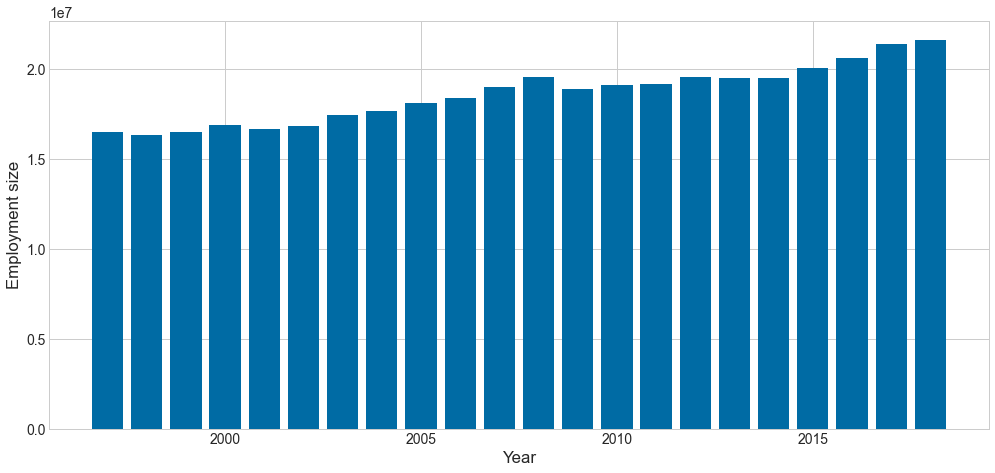

In [218]:
# The employment size across the years
fig,ax=plt.subplots(figsize=(15,7))
plt.style.use("tableau-colorblind10")
ax.bar(Emp_summary.index,Emp_summary._EMPLOYMENT_)
ax.set_xlabel('Year')
ax.set_ylabel('Employment size')
plt.show()

In [219]:
#Get the sum of Employment sizes for different industries 
industries = output.groupby(["LMO_Detailed_Industry"])["_EMPLOYMENT_"].sum()

<AxesSubplot:ylabel='LMO_Detailed_Industry'>

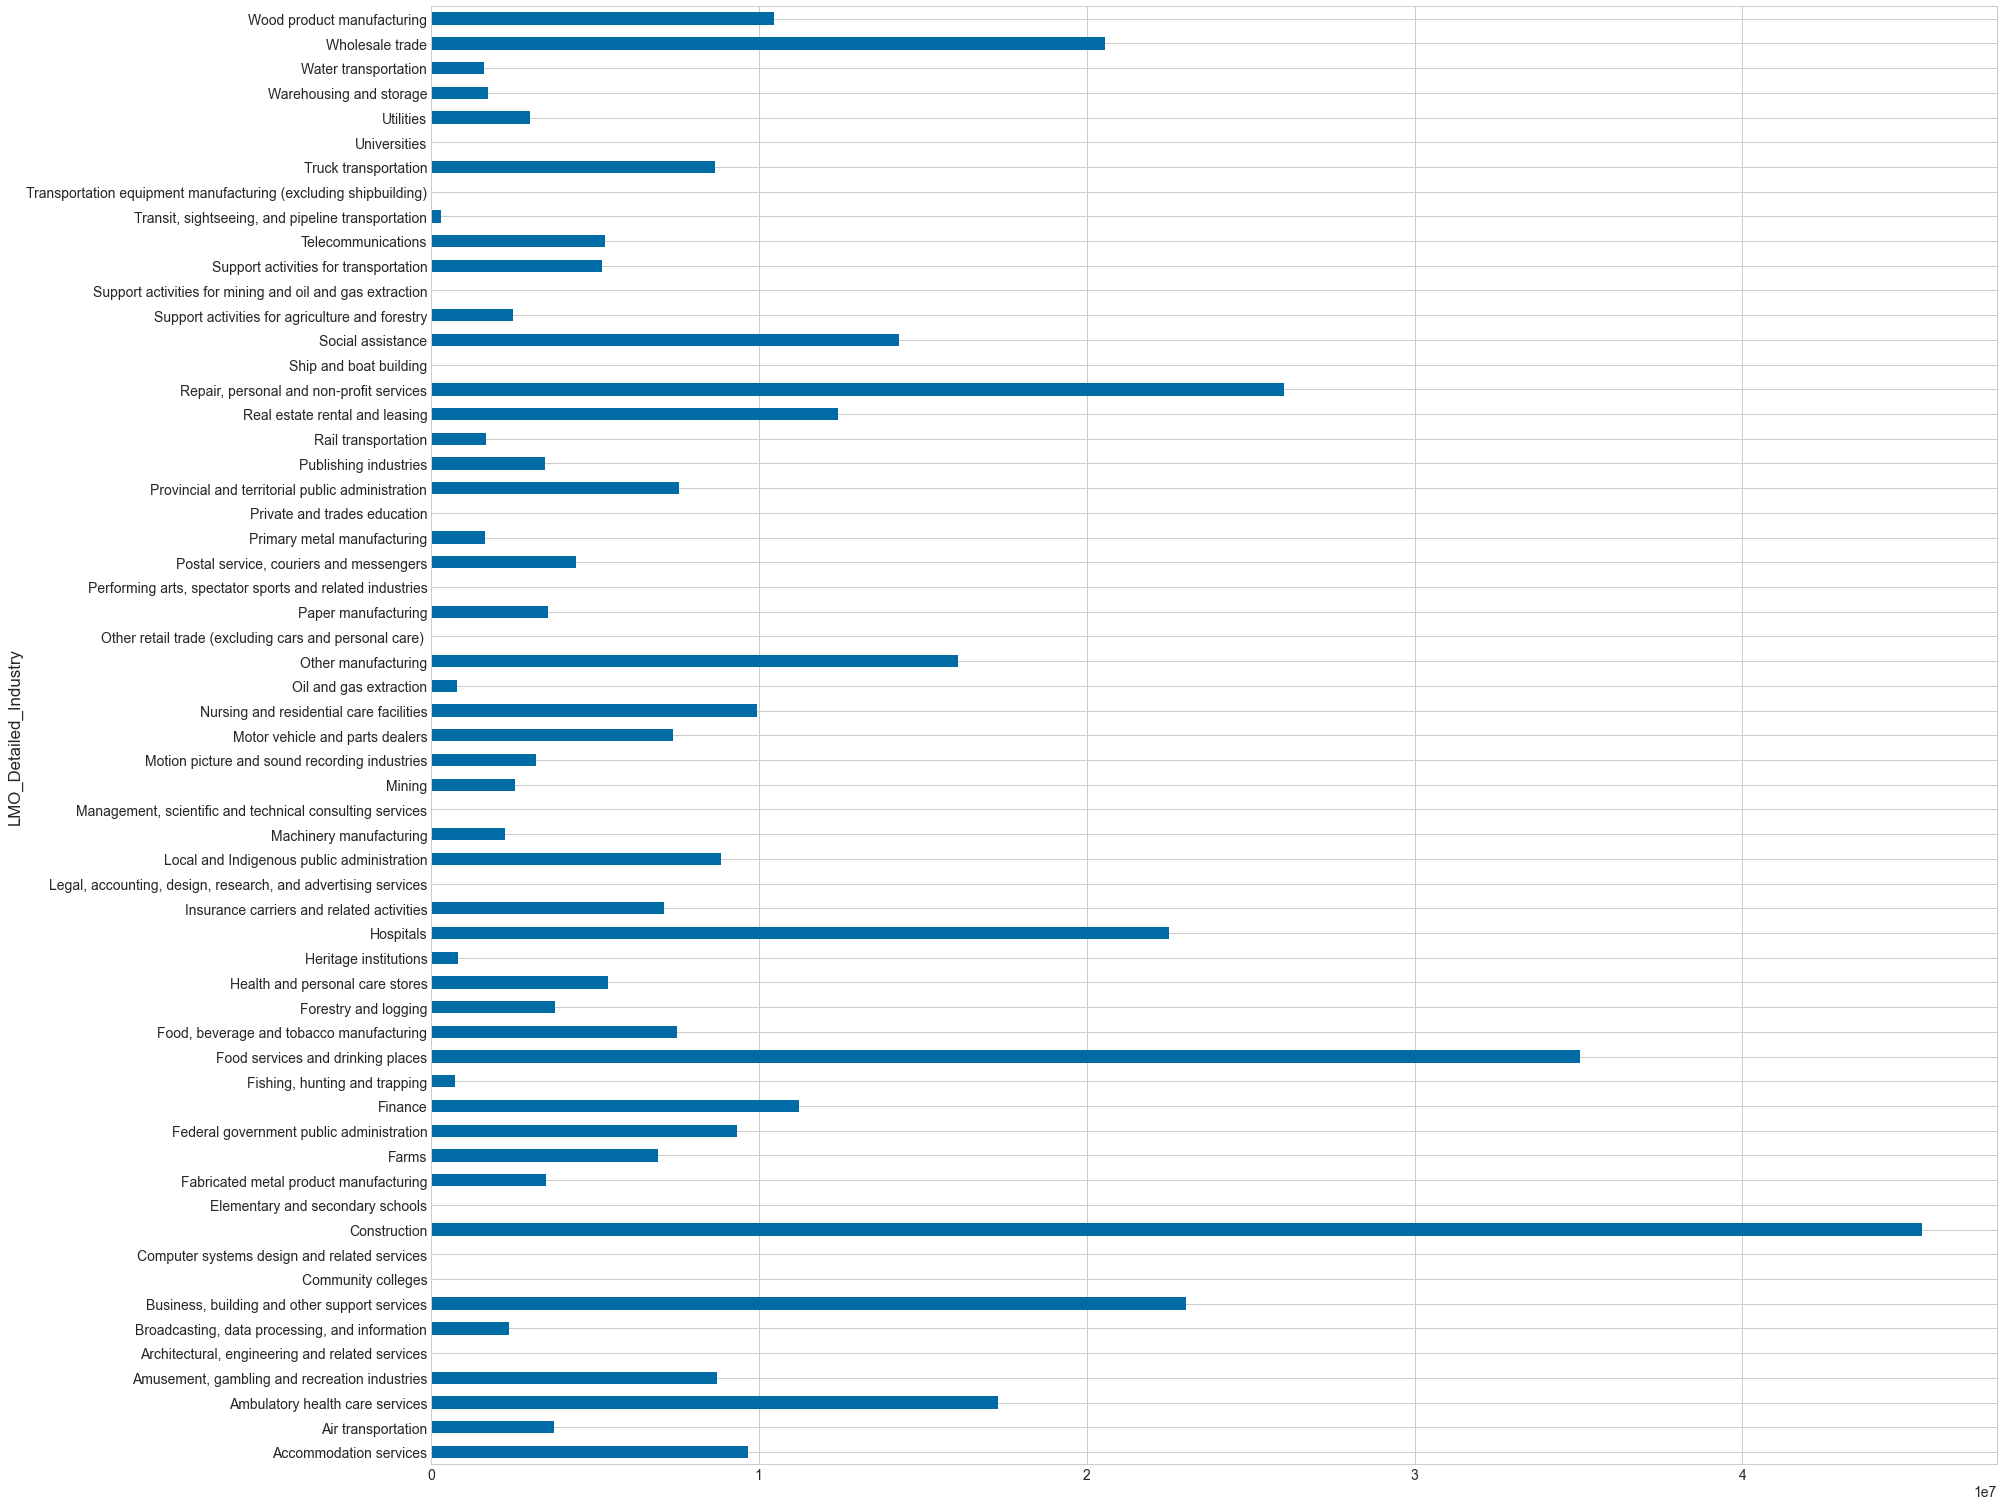

In [220]:
plt.style.use('seaborn-whitegrid')
industries.plot(kind="barh", figsize=(25,25))

In [221]:
# Group by 'LMO_Detailed_Industry' and 'year' columns and sum their respective employment levels
summary=output.groupby(['LMO_Detailed_Industry','SYEAR']).sum('_EMPLOYMENT_')
summary

SMTH  _EMPLOYMENT_
LMO_Detailed_Industry      SYEAR                    
Accommodation services     1997     78      381250.0
                           1998     78      405500.0
                           1999     78      425000.0
                           2000     78      454750.0
                           2001     78      528250.0
...                                ...           ...
Wood product manufacturing 2014     78      404500.0
                           2015     78      432000.0
                           2016     78      384500.0
                           2017     78      333500.0
                           2018     78      286500.0

[1298 rows x 2 columns]

In [222]:
# The highest 10 industries in terms of Employment levels
highest_10=output.groupby('LMO_Detailed_Industry').sum('_EMPLOYMENT_').nlargest(10,'_EMPLOYMENT_')
highest_10

,SYEAR,SMTH,_EMPLOYMENT_
LMO_Detailed_Industry,,,
Construction,529980,1716,45485000.0
Food services and drinking places,529980,1716,35033250.0
"Repair, personal and non-profit services",529980,1716,26021250.0
"Business, building and other support services",529980,1716,23018500.0
Hospitals,529980,1716,22518250.0
Wholesale trade,529980,1716,20564750.0
Ambulatory health care services,529980,1716,17292750.0
Other manufacturing,529980,1716,16090250.0
Social assistance,529980,1716,14290250.0


<ipython-input-223-c485f27c6af3>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(highest_10.index, rotation=90)


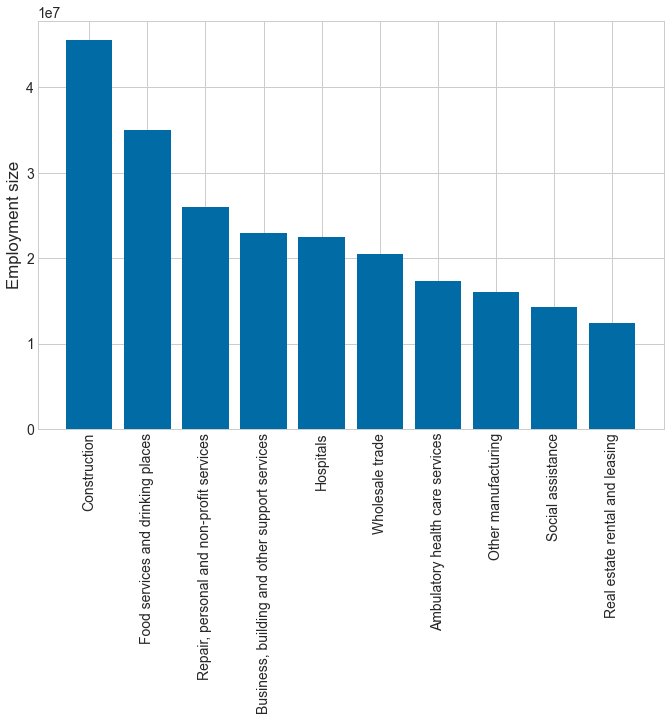

In [223]:
fig,ax=plt.subplots(figsize=(10,7))
plt.style.use("tableau-colorblind10")
ax.bar(highest_10.index,highest_10._EMPLOYMENT_)
ax.set_xticklabels(highest_10.index, rotation=90)
ax.set_ylabel('Employment size')
plt.show()

In [224]:
def lplot(sector):
    '''
    The function will create a line plot for certain industries and their respective employment level from 1997 to 2018 to show 
    how the employment levels change over time according to each industry
    Args:
    ''''''''
    sector: The industry that the line plot will be created for.
    
    '''
    sec=summary.loc[sector]
    fig, ax = plt.subplots(figsize=(10,5))
    plt.style.use("tableau-colorblind10")

    sns.lineplot(x=sec.index, y="_EMPLOYMENT_", data=sec)
    plt.xlabel("Year")
    plt.ylabel("Employment size")
    plt.title(sector)

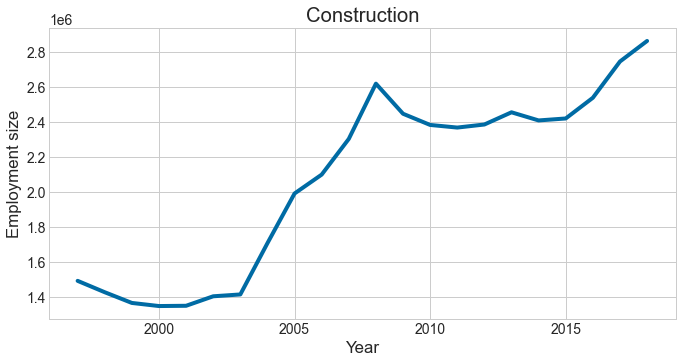

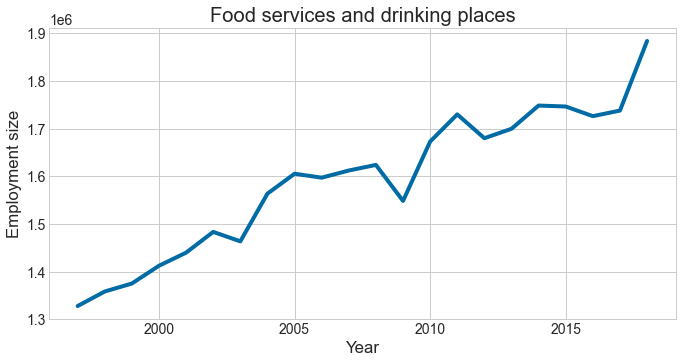

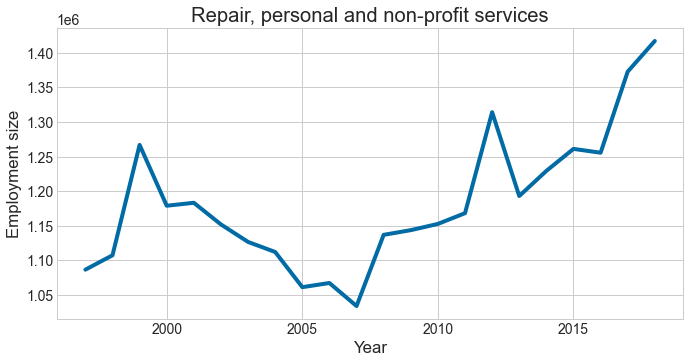

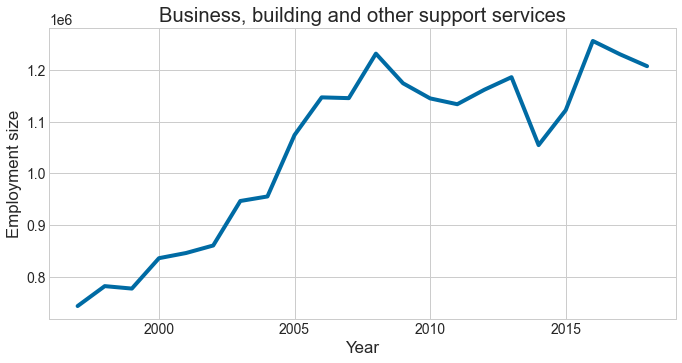

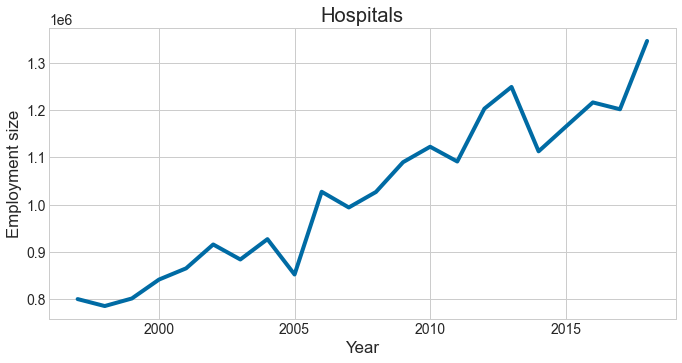

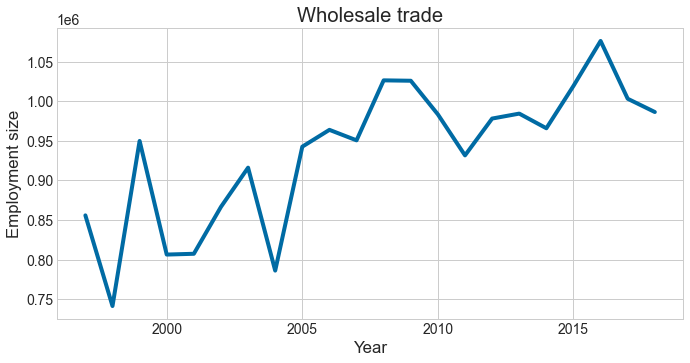

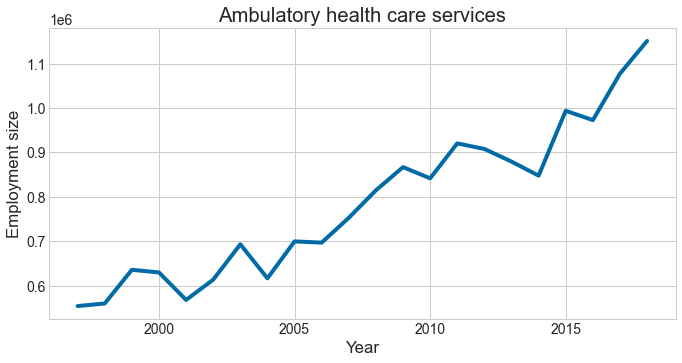

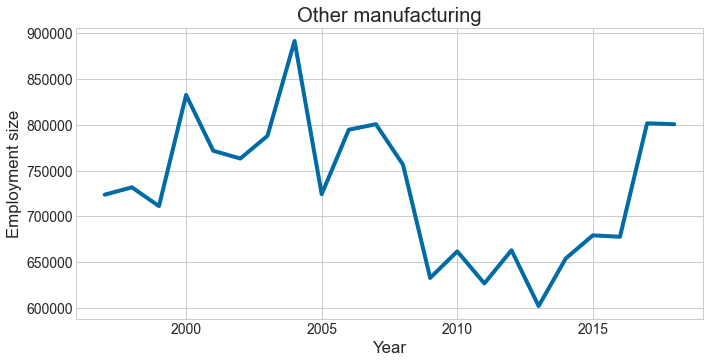

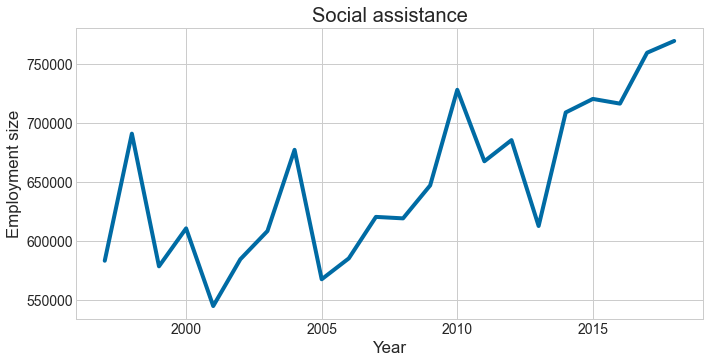

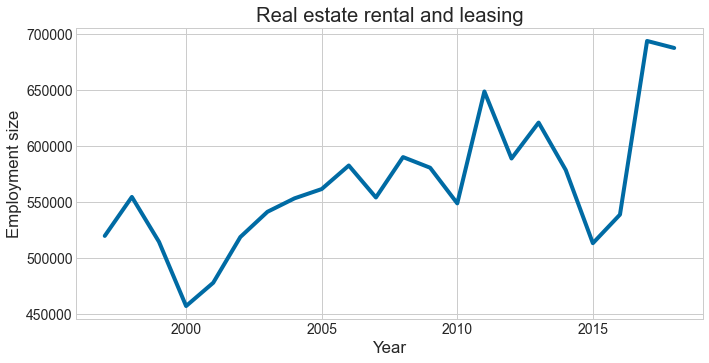

In [225]:
# The employment level across years for the highest ten employment level industries
industries_list=[]
industries_list=[i for i,val in highest_10.iterrows()]

for i in industries_list:
    lplot(i)



In [226]:
emp_ =  output.groupby('SYEAR').agg({'_EMPLOYMENT_':sum})
for i in industries_list:
    emp_[i] = output[output.LMO_Detailed_Industry == i].groupby('SYEAR').agg({'_EMPLOYMENT_':sum})
emp_.head()

,_EMPLOYMENT_,Construction,Food services and drinking places,"Repair, personal and non-profit services","Business, building and other support services",Hospitals,Wholesale trade,Ambulatory health care services,Other manufacturing,Social assistance,Real estate rental and leasing
SYEAR,,,,,,,,,,,
1997,16542500.0,1489750.0,1327750.0,1086750.0,743750.0,800250.0,855750.0,553750.0,723750.0,583250.0,519750.0
1998,16338500.0,1424750.0,1358250.0,1107500.0,782250.0,785500.0,741250.0,559500.0,731750.0,691250.0,554500.0
1999,16531250.0,1363500.0,1375000.0,1266750.0,777500.0,801500.0,949750.0,635500.0,711250.0,578500.0,514500.0
2000,16888000.0,1345750.0,1412250.0,1179000.0,836250.0,841500.0,806250.0,629500.0,832750.0,610750.0,457250.0
2001,16674500.0,1347250.0,1439750.0,1183250.0,846250.0,865250.0,807250.0,567500.0,771750.0,544750.0,478000.0


Text(0.5, 0, 'YEAR')

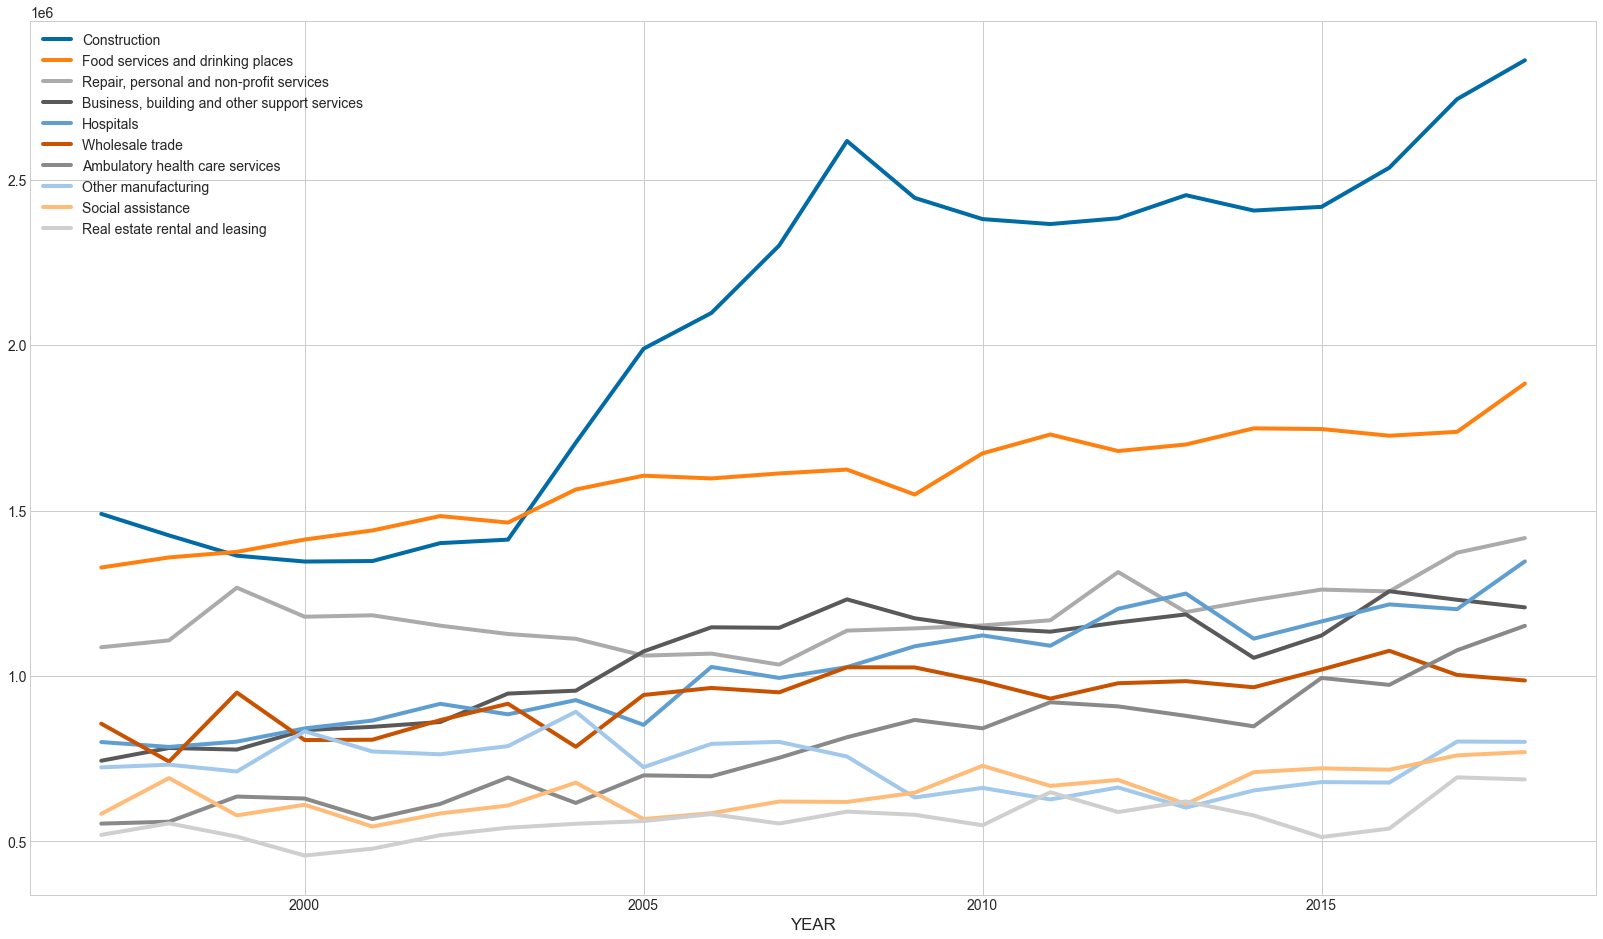

In [227]:
plt.rcParams["figure.figsize"] = (25,15)
emp_.plot(use_index= True, y=emp_.columns[1:], kind="line")
plt.xlabel('YEAR')

In [230]:
# Get the lowest industries in terms of employment levels
lowest_5=output.groupby('LMO_Detailed_Industry').sum('_EMPLOYMENT_').nsmallest(18,'_EMPLOYMENT_')

In [231]:
lowest_5=lowest_5.tail(5)
lowest_5

,SYEAR,SMTH,_EMPLOYMENT_
LMO_Detailed_Industry,,,
"Transit, sightseeing, and pipeline transportation",529980,1716,303000.0
"Fishing, hunting and trapping",529980,1716,741250.0
Oil and gas extraction,529980,1716,808750.0
Heritage institutions,529980,1716,827000.0
Water transportation,529980,1716,1610500.0


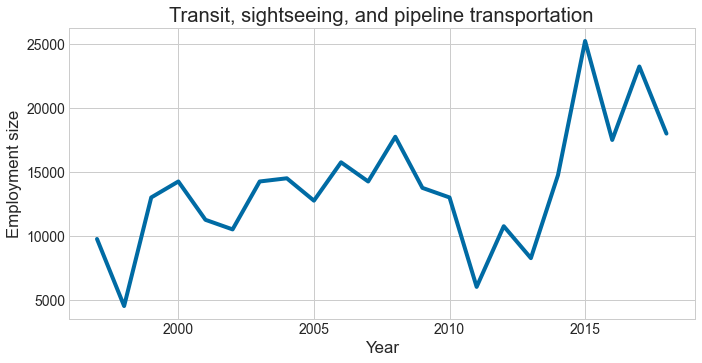

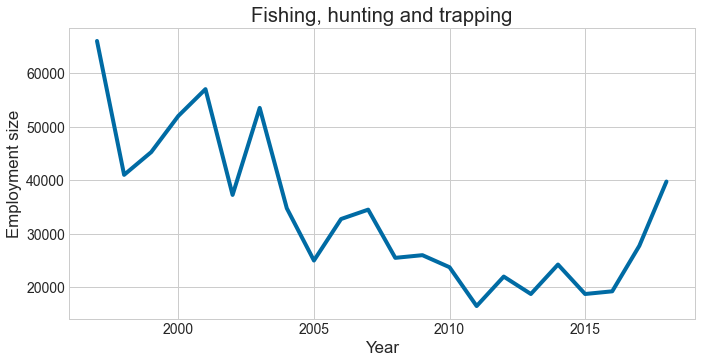

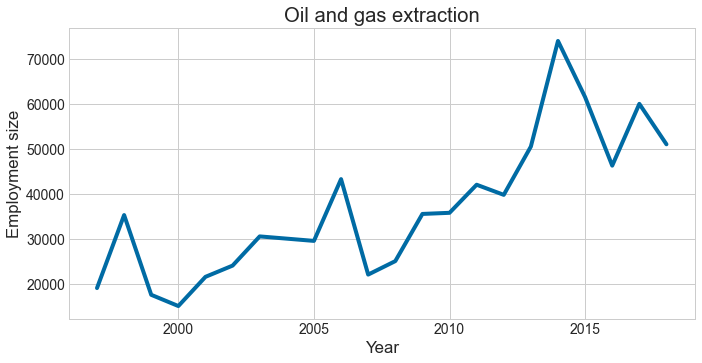

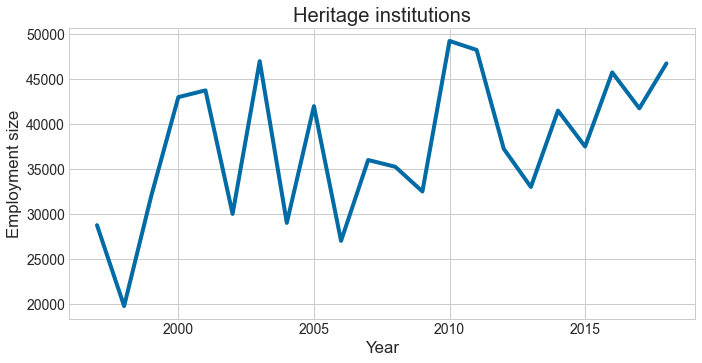

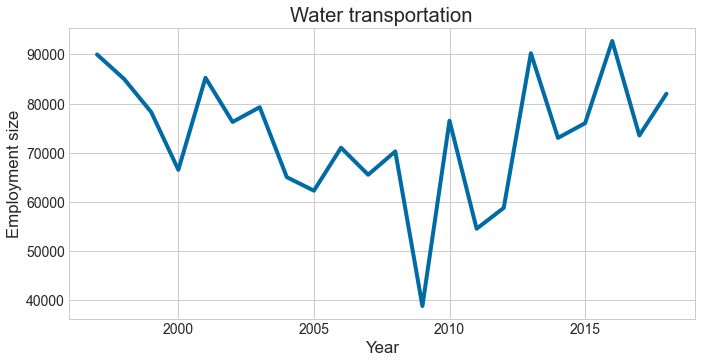

In [234]:
# The Employment levels for the lowest 5 industries across the years
low_ind_list=[i for i,val in lowest_5.iterrows()]
for i in low_ind_list:
    lplot(i)

<ipython-input-235-c12ac619aab4>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(lowest_5.index, rotation=90)


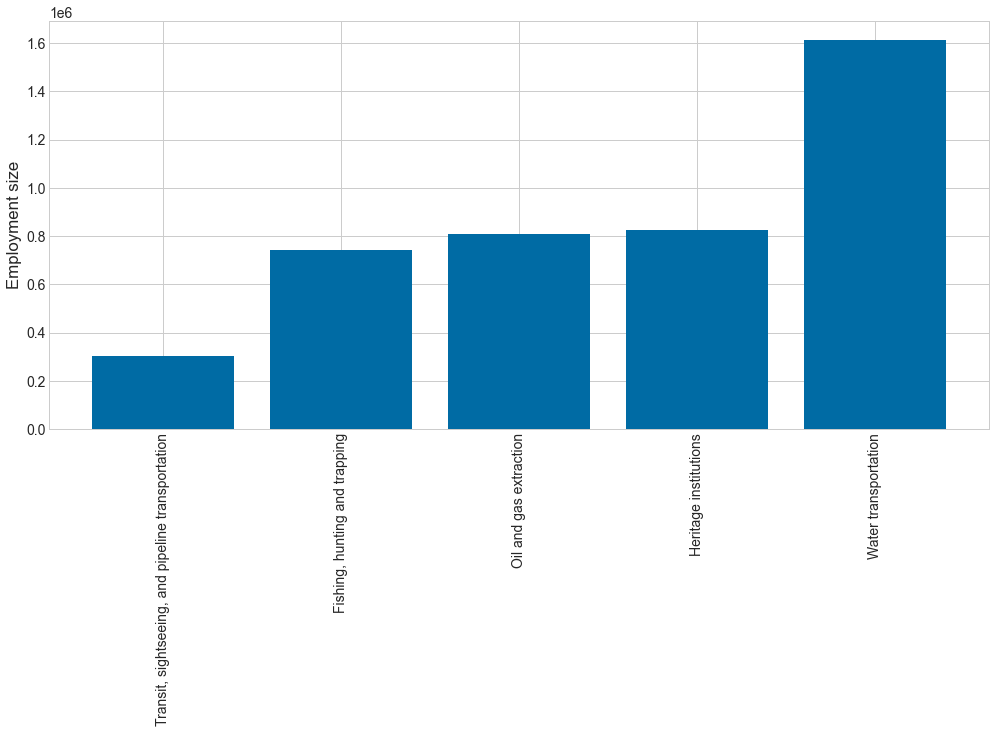

In [235]:
# The lowest 5 industries
fig,ax=plt.subplots(figsize=(15,7))
plt.style.use("tableau-colorblind10")
ax.bar(lowest_5.index,lowest_5._EMPLOYMENT_)
ax.set_xticklabels(lowest_5.index, rotation=90)
ax.set_ylabel('Employment size')
plt.show()